In [ ]:
pip install matplotlib numpy scipy astropy jupyter notebook pandas eleanor

     |████████████████████████████████| 6.7 MB 4.6 MB/s 
     |████████████████████████████████| 832 kB 43.1 MB/s 
     |████████████████████████████████| 245 kB 50.5 MB/s 
     |████████████████████████████████| 4.4 MB 39.9 MB/s 
     |████████████████████████████████| 110.5 MB 565 bytes/s 
     |████████████████████████████████| 41 kB 140 kB/s 
     |████████████████████████████████| 98 kB 6.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 802 kB 38.8 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.2 MB 31.9 MB/s 
     |████████████████████████████████| 503 kB 60.9 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 2.9 MB 27.9 MB/s 
     |████████████████████████████████| 3.8 MB 34.4 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for eleanor: filename=eleanor-2.0.3-py2.py3-none-any.whl size

In [ ]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [ ]:
eleanor.Update(sector=33)

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 33...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 33 now available.


In [ ]:
star = eleanor.Source(name='WASP-76b', sector=30)

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 30...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 30 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


In [ ]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True) #regressors='corner'
q = data.quality == 0

100%|██████████| 3783/3783 [01:50<00:00, 34.31it/s]


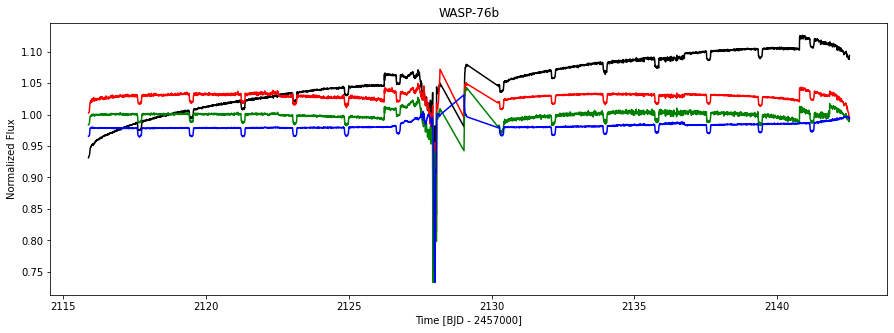

In [ ]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-76b');

In [ ]:
data.bkg_type

'PC_LEVEL'

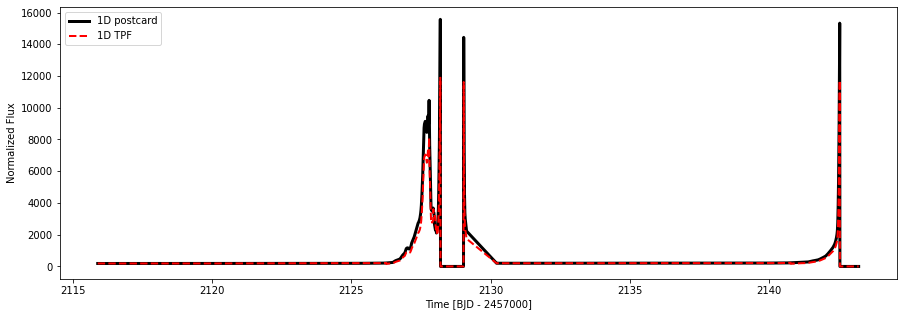

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

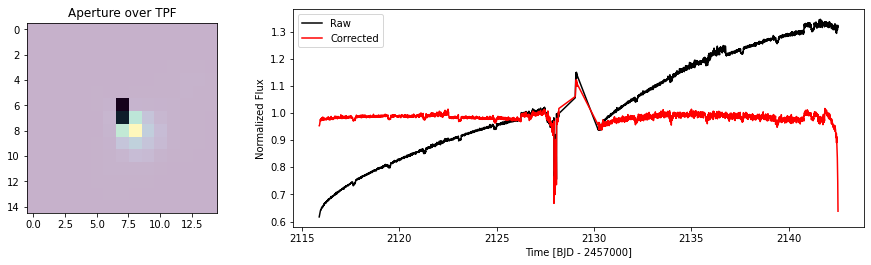

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.all_apertures[0], cmap='Greys', alpha=0.7)
ax1.set_title('Aperture over TPF')

ax2.plot(data.time[q], data.all_raw_flux[0][q]/np.nanmedian(data.all_raw_flux[0][q]), 'k', label='Raw')
ax2.plot(data.time[q], data.all_corr_flux[0][q]/np.nanmedian(data.all_corr_flux[0][q]) - 0.015, 'r', label='Corrected')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')
ax2.legend();

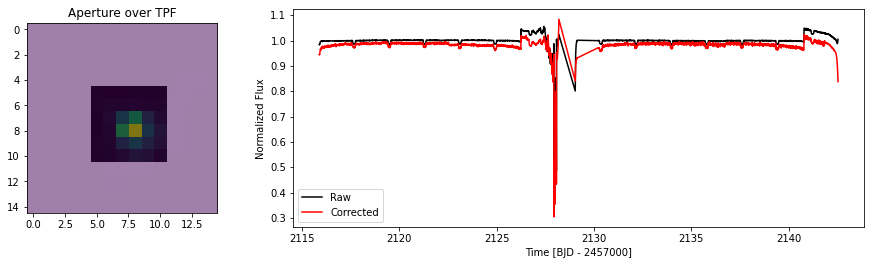

In [ ]:
eleanor.TargetData.custom_aperture(data, shape='rectangle', h=6, w=6, theta= 0, method='exact')
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.015, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

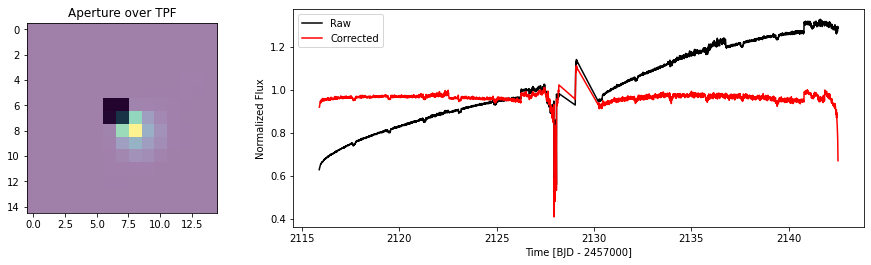

In [ ]:
mask = np.zeros(np.shape(data.tpf[0]))
mask[6:8,6:8] = 1
data.get_lightcurve(aperture=mask)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(mask, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.035, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

In [ ]:
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

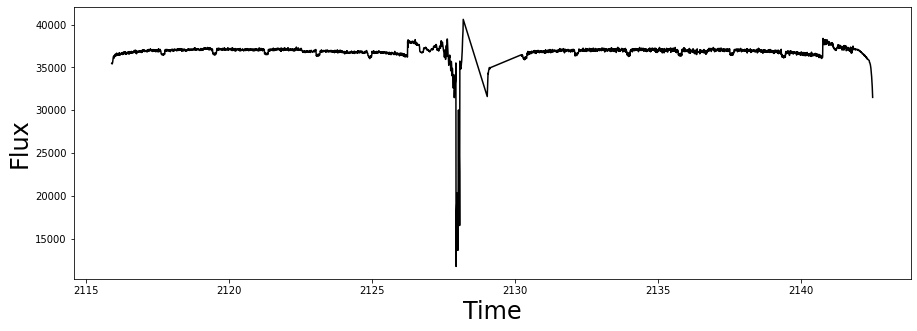

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

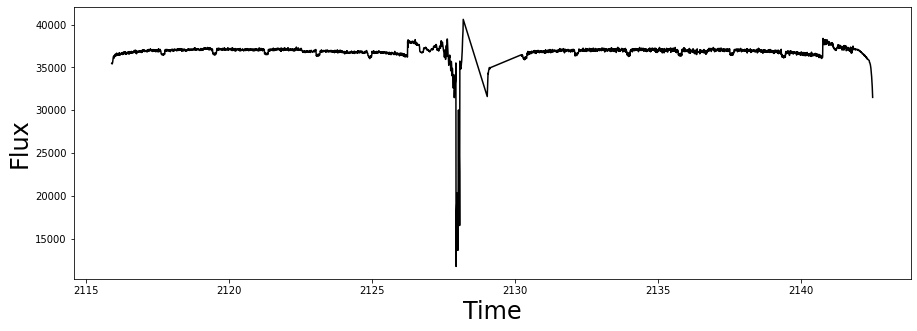

In [ ]:
data.quality[q][(data.time[q] > 1333) & (data.time[q] < 1337)] = -8675309
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

q = data.quality <= 0.5

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);


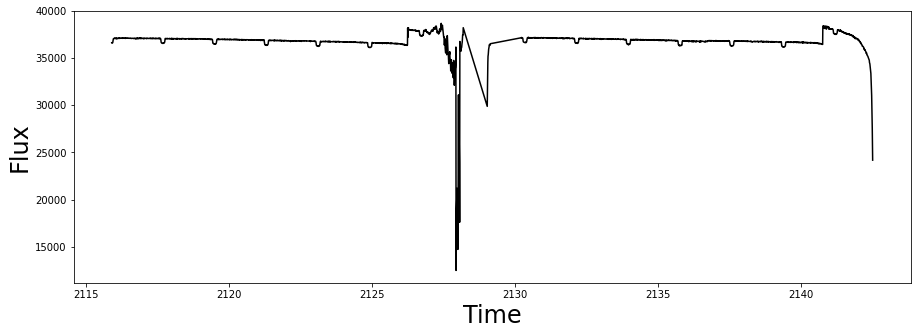

In [ ]:
data.cbvs = np.zeros_like(data.cbvs)
data.centroid_xs = np.zeros_like(data.centroid_xs)
data.centroid_ys = np.zeros_like(data.centroid_ys)

corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [ ]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

100%|██████████| 3783/3783 [01:49<00:00, 34.45it/s]


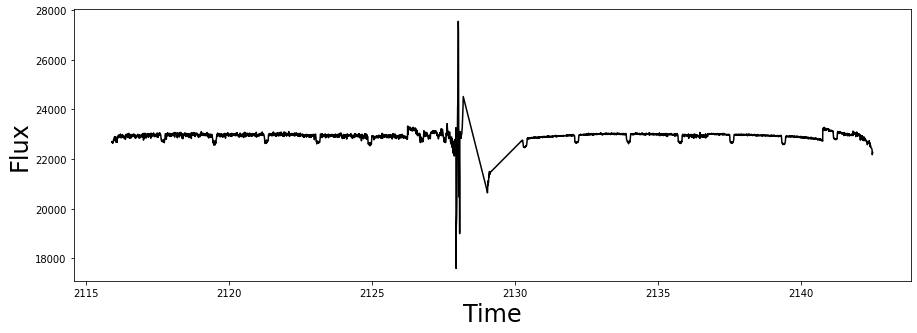

In [ ]:
reg_array = np.array([data.psf_b, data.psf_c, data.psf_x]).T
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux, regressors=reg_array)

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [ ]:
eleanor.TargetData.psf_lightcurve(data, model='gaussian')

100%|██████████| 3783/3783 [01:48<00:00, 34.71it/s]


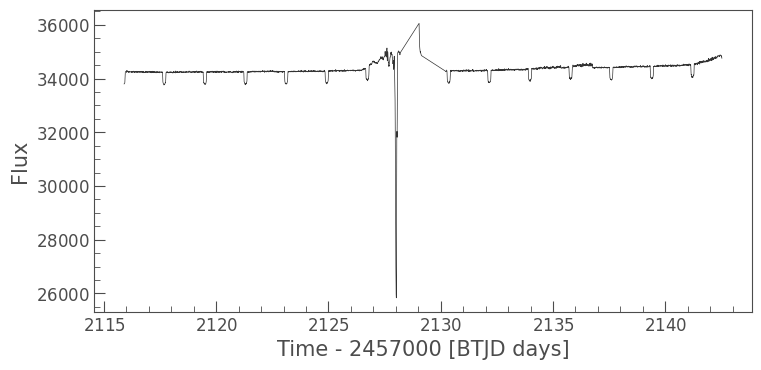

In [ ]:
lk = data.to_lightkurve(flux=data.psf_flux)
lk.plot();

In [ ]:
eleanor.TargetData.psf_lightcurve(data, model='gaussian', nstars=2, xc=[3.1, 7.0], yc=[6.8, 6.2])

100%|██████████| 3783/3783 [02:07<00:00, 29.76it/s]


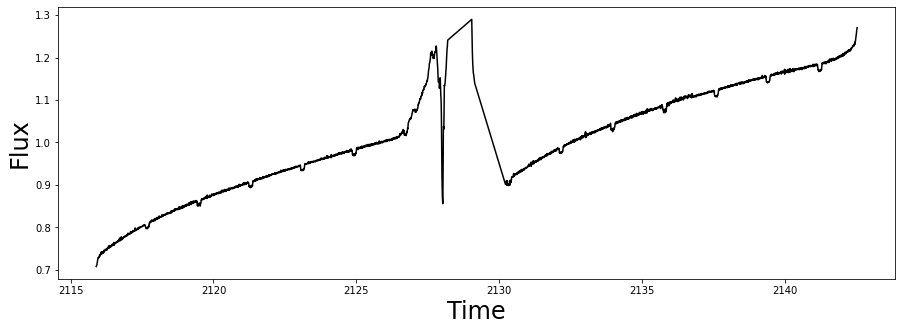

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data.time[q], data.all_psf[q,0]/np.nanmedian(data.all_psf[q,0])+0.015, 'r')
plt.plot(data.time[q], data.all_psf[q,1]/np.nanmedian(data.all_psf[q,1]), 'k')


plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

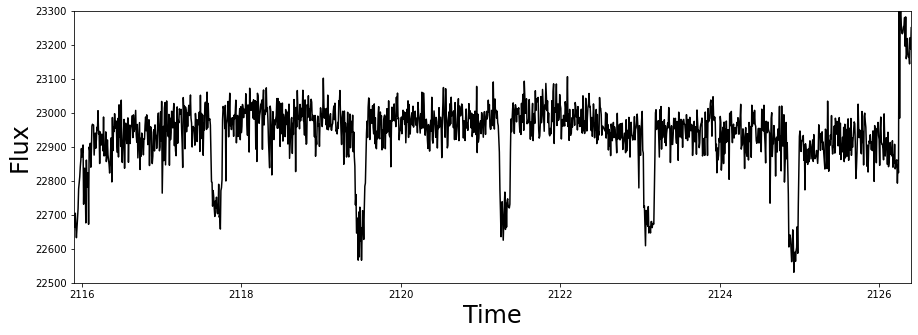

In [ ]:
plt.figure(figsize=(15,5))

q = data.quality == 0
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylim(22500,23300)
plt.xlim(2115.9,2126.4)
plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [ ]:
star.tess_mag = 10.53

In [ ]:
star = eleanor.Source(name='WASP-76b', sector=30)
data = eleanor.TargetData(star, height=31, width=31)

No eleanor postcard has been made for your target (yet). Using TessCut instead.


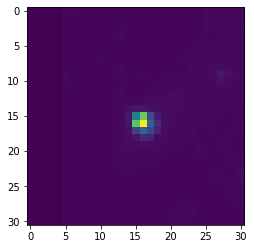

In [ ]:
plt.imshow(data.tpf[300]);

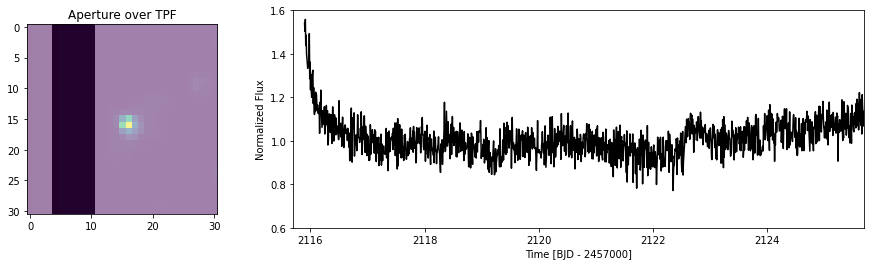

In [ ]:
ap = np.zeros_like(data.tpf[300])

ap[:,4:11] = 1


data.get_lightcurve(aperture=ap)
q = data.quality == 0

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.0, 'k')
ax2.set_ylim(0.6, 1.6004)
ax2.set_xlim(2115.7, 2125.7)
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

In [ ]:
star = eleanor.Source(name='pi Mensae', sector=1)
data = eleanor.TargetData(star, height=21, width=13)

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  1...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  1 now available.


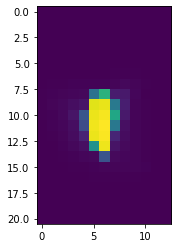

In [ ]:
plt.imshow(data.tpf[300]);

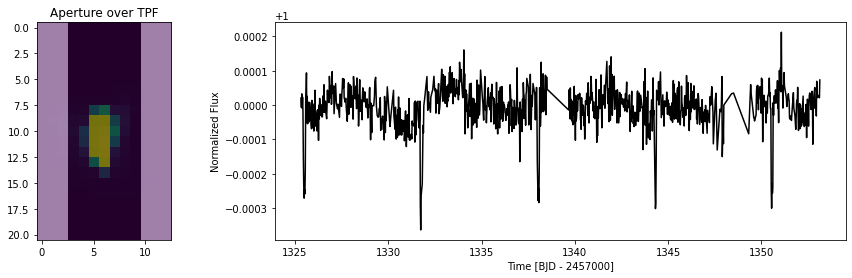

In [ ]:
ap = np.zeros_like(data.tpf[300])
ap[:,3:10] = 1


data.get_lightcurve(aperture=ap)
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux, regressors='corner')
q = data.quality == 0

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], corr_flux[q]/np.nanmedian(corr_flux[q]) - 0.0, 'k')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

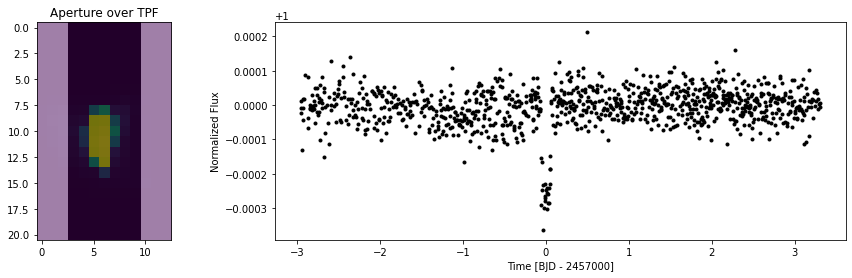

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

modtime = np.mod(data.time[q], 6.268)-2.96

ax2.plot(modtime, corr_flux[q]/np.nanmedian(corr_flux[q]) - 0.0, 'k.')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');